In [3]:
%load_ext autoreload
%autoreload 2
from IPython.display import clear_output
import os
import fnmatch
import numpy as np
import pickle
import matplotlib.pyplot as plt
import umap
from sklearn.mixture import GaussianMixture
from scipy import stats
# from sklearn.cluster import OPTICS

# import tensorflow as tf
# from tensorflow.keras import layers
# from tensorflow.keras.backend import mean
# from tensorflow.keras.backend import square
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import CuDNNLSTM
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import RepeatVector
# from tensorflow.keras.layers import TimeDistributed
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.layers import Flatten

# from tensorflow.keras.utils import Sequence
# from tensorflow.keras import Input
# from tensorflow.keras import Model
# from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras.layers import Conv1D
from scipy.stats import zscore

plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.rcParams.update({'font.size': 12})
plt.rcParams.update(plt.rcParamsDefault)

np.random.seed(seed=11)


cwd = os.getcwd()

if cwd.split("/")[1] == "export":
    data_dir = "../../../files_from_snuffy"
else:
    data_dir = "../../../data_GRS1915"


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
segments_dir = '{}/468202_len128_s2_4cad_counts_errorfix.pkl'.format(data_dir)
errors_dir = '{}/468202_len128_s2_4cad_errors_errorfix.pkl'.format(data_dir)
recos_dir = "{}/reconstructions_from_model_2020-04-29_09-12-23.pkl".format(data_dir)

with open(segments_dir, 'rb') as f:
    segments = pickle.load(f)
with open(errors_dir, 'rb') as f:
    errors = pickle.load(f)
with open(recos_dir, 'rb') as f:
    recos = pickle.load(f)

recos= recos*np.std(segments, axis=1) + np.mean(segments, axis=1)

# errors = ((errors)/np.expand_dims(np.std(segments, axis=1), axis=1)).astype(np.float32)
# segments = zscore(segments, axis=1).astype(np.float32)  # standardize per segment

In [39]:
# load observation classifications from Huppenkothen 2017
clean_belloni = open('{}/1915Belloniclass_updated.dat'.format(data_dir))
lines = clean_belloni.readlines()
states = lines[0].split()
belloni_clean = {}
for h,l in zip(states, lines[1:]):
    belloni_clean[h] = l.split()
    #state: obsID1, obsID2...
ob_state = {}
for state, obs in belloni_clean.items():
    if state == "chi1" or state == "chi2" or state == "chi3" or state == "chi4": state = "chi"
    for ob in obs:
        ob_state[ob] = state
        
# load IDs of segmented light curves: observationsID_segmentIndex
with open('{}/468202_len128_s2_4cad_ids_errorfix.pkl'.format(data_dir), 'rb') as f:
    seg_ids = pickle.load(f)

        
seg_ObIDs = [seg.split("_")[0] for seg in seg_ids] # get rid of the within-observation segment indices and create a degenerate list of observation IDs

classes = np.array(["alpha", "beta", "gamma", "delta", "theta", "kappa", "lambda", "mu", "nu", "rho", "phi", "chi", "eta", "omega"])
scales = []
segment_class = []
for ob in seg_ObIDs:
    if ob in ob_state:
        segment_class.append(ob_state[ob])
    else:
        segment_class.append("Unknown")

In [ ]:
seg_ind=18

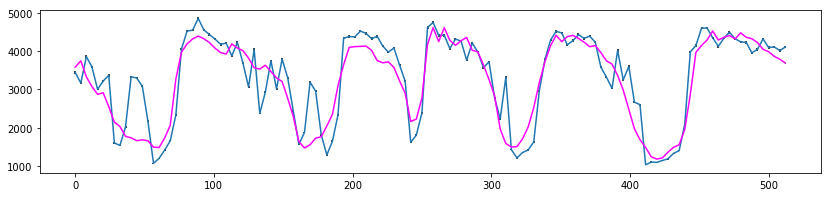

In [152]:
seg_ind+=1
pylab.rcParams['figure.figsize'] = (14, 3)
plt.errorbar(np.linspace(0,512, num=128), segments[seg_ind], yerr=errors[seg_ind], ecolor="black")

plt.plot(np.linspace(0,512, num=128), recos[seg_ind], c="magenta", zorder=5)
plt.show()

In [42]:
np.where(np.array(segment_class) == "alpha")

(array([    65,    229,    261, ..., 468069, 468090, 468096]),)

/home/jkok1g14/anaconda3/envs/jakub-tf/lib/python3.5/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


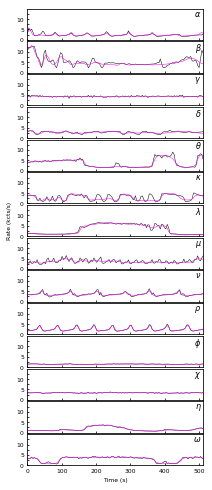

In [188]:
# with open('../../../data_GRS1915/1776_light_curves_1s_bin_errorfix.pkl', 'rb') as f:
#     lcs = pickle.load(f)
# with open('../../../data_GRS1915/1776_light_curves_1s_bin_ids_errorfix.pkl', 'rb') as f:
#     ids = pickle.load(f)
    
    
# clean_belloni = open('../../../data_GRS1915/1915Belloniclass_updated.dat')
# lines = clean_belloni.readlines()
# states = lines[0].split()
# belloni_clean = {}
# for h,l in zip(states, lines[1:]):
#     belloni_clean[h] = l.split()
#     #state: obsID1, obsID2...
# ob_state = {}
# for state, obs in belloni_clean.items():
#     if state == "chi1" or state == "chi2" or state == "chi3" or state == "chi4": state = "chi"
#     for ob in obs:
#         ob_state[ob] = state


        

# inv_ob_state = {}
# for k, v in ob_state.items():
#     inv_ob_state[v] = inv_ob_state.get(v, [])
#     inv_ob_state[v].append(k)


import matplotlib.pylab as pylab
import matplotlib.ticker as ticker
#https://stackoverflow.com/questions/8389636/creating-over-20-unique-legend-colors-using-matplotlib


pylab.rcParams['figure.figsize'] = (3.15, 8.4) # A4 size 210mm x 297mm

# colors = matplotlib.colors.CSS4_COLORS.keys()
# colors = np.array(list(colors))


# NUM_COLORS = 14
# cm = plt.get_cmap("jet")#('gist_rainbow')
# colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

ids_ar = np.array(segment_class)

# class_names = list(inv_ob_state.keys())


alpha = np.where(ids_ar == "alpha")[0][1]#1
beta= np.where(ids_ar == "beta")[0][7]#7
gamma=np.where(ids_ar == "gamma")[0][4]
delta=np.where(ids_ar == "delta")[0][5]
theta=np.where(ids_ar == "theta")[0][4]#4
kappa=np.where(ids_ar == "kappa")[0][3]
lambda1=np.where(ids_ar == "lambda")[0][2]
mu=np.where(ids_ar == "mu")[0][1]
nu=np.where(ids_ar == "nu")[0][1]
rho=np.where(ids_ar == "rho")[0][1]
phi=np.where(ids_ar == "phi")[0][1]
chi=np.where(ids_ar == "chi")[0][1]
eta=np.where(ids_ar == "eta")[0][4]
omega=np.where(ids_ar == "omega")[0][3]


selected_lcs = [alpha,beta,gamma,delta,theta,kappa,lambda1,mu,nu,rho,phi,chi,eta,omega]


fig, axes = plt.subplots(nrows=14, ncols=1)
axes = axes.flatten()

plt.subplots_adjust(hspace=0.05)
plt.subplots_adjust(wspace=0.01)

# good_classes = ["delta", "mu", "rho", "phi"]
intervals = {}

class_names = np.array(["alpha", "beta", "gamma", "delta", "theta", "kappa", "lambda", "mu", "nu", "rho", "phi", "chi", "eta", "omega"])


for plot_ind in range(14):
    light_c = selected_lcs[plot_ind]
    class_name = class_names[plot_ind]    
    axes[plot_ind].plot(np.linspace(0,512, num=128), segments[light_c], c="black", linewidth=0.5, zorder=1, label="Input")
    axes[plot_ind].plot(np.linspace(0,512, num=128), recos[light_c], c="magenta", linewidth=0.5, zorder=2, label="Reconstruction")
    axes[plot_ind].set_ylim([0, 15000])
    axes[plot_ind].set_xlim([0, 512])
    axes[plot_ind].text(0.99,0.99,r"$\{}$".format(class_name), ha='right', va='top', transform=axes[plot_ind].transAxes, size=8)
        
    axes[plot_ind].tick_params(axis="y", which="major", length=2, width=0.75, labelsize=6, direction="in")
#     axes[plot_ind].tick_params(axis="y", which="minor", length=2, width=0.75, labelsize=8, direction="in")


#     if plot_ind%2 == 0:
#         axes[plot_ind].tick_params(axis="y", which="major", length=5, width=1, labelsize=8, direction="in")
#     else:
#         axes[plot_ind].tick_params(axis="y", which="major", length=5, width=1, labelsize=0, direction="in")
#         plt.setp(axes[plot_ind].get_yticklabels(), visible=False)

    if plot_ind == 6:
        axes[plot_ind].set_ylabel("Rate (kcts/s)", size=6)
    if plot_ind == 13:#plot_ind == 12 or plot_ind == 13
        axes[plot_ind].tick_params(axis="x", which="major", length=2, width=0.75, labelsize=6, direction="in")
        axes[plot_ind].set_xlabel("Time (s)", size=6)

    else:
        axes[plot_ind].tick_params(axis="x", which="major", length=2, width=0.75, labelsize=0, direction="in")
        plt.setp(axes[plot_ind].get_xticklabels(), visible=False)
    
#     axes[plot_ind].set_yticks([0, 2000, 4000, 6000, 8000, 10000, 12000, 14000])
#     axes[plot_ind].set_yticklabels([0, "", "", 6, "", "", 12, ""])
    axes[plot_ind].set_yticks([0, 2500, 5000, 7500, 10000, 12500])
    axes[plot_ind].set_yticklabels([0, "", 5, "", 10, "",])
    axes[plot_ind].set_xticks([0, 100, 200,300, 400, 500])
    axes[plot_ind].set_xticklabels([0, 100, 200,300, 400, 500])

    
axes.reshape((14,1))


# axes[0][0].tick_params(axis="x", which="major", length=5, width=1, labelsize=5, direction="in")
# axes[0][1].tick_params(axis="x", which="major", length=5, width=1, labelsize=5, direction="in")
# axes[1][0].tick_params(axis="x", which="major", length=5, width=1, labelsize=25, direction="in")
# axes[1][1].tick_params(axis="x", which="major", length=5, width=1, labelsize=25, direction="in")

# axes[0][0].tick_params(axis="y", which="major", length=5, width=1, labelsize=25, direction="in")
# axes[1][0].tick_params(axis="y", which="major", length=5, width=1, labelsize=25, direction="in")
# axes[0][1].tick_params(axis="y", which="major", length=5, width=1, labelsize=5, direction="in")
# axes[1][1].tick_params(axis="y", which="major", length=5, width=1, labelsize=5, direction="in")

# plt.setp(axes[0][1].get_yticklabels(), visible=False)
# plt.setp(axes[1][1].get_yticklabels(), visible=False)
# plt.setp(axes[0][1].get_xticklabels(), visible=False)
# plt.setp(axes[0][0].get_xticklabels(), visible=False)

# axes[1][0].set_xticks([500,1000,1500,2000])
# axes[1][1].set_xticks([500,1000,1500,2000])


# axes[0][0].yaxis.set_label_coords(-0.2, 0)
# axes[1][0].xaxis.set_label_coords(1, -0.1)

# plt.suptitle("14 classes of activity of x-ray black hole binary GRS1915+105", fontsize=40, y=0.92)

# plt.gca().set_axis_off()
# plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
#             hspace = 0, wspace = 0)
# plt.margins(0,0)
# plt.gca().xaxis.set_major_locator(plt.NullLocator())
# plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.savefig('all_classes_of_GRS1915_segments_with_reconstructions.png', dpi=300, bbox_inches = 'tight',pad_inches = 0)
# plt.legend()
fig.show()

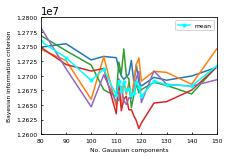

In [219]:
pylab.rcParams['figure.figsize'] = (3.15, 2.15)
data_subsets = [(0,50000), (50000, 100000), (100000,150000),(150000,200000), (200000, 250000)]
component_no_list = [10,25,50,70,80,90,100,105,110,111,112,113,114,115,116,117,118,119,120,125,130,140,150,200,300]
bics = np.array([
[1.513076963327877596e+07, 1.373494201573342085e+07, 1.310223591745524108e+07, 1.287644645175125077e+07, 1.274916968428172357e+07, 1.275498408091743104e+07, 1.272725532548042759e+07,1.273327056713533960e+07, 1.273110944201433845e+07, 1.271215291174531914e+07, 1.269974317490880564e+07, 1.269413576213483885e+07, 1.269831422006917745e+07, 1.270286540602960251e+07, 1.272652081320444494e+07, 1.268854252120269835e+07, 1.271878362980804965e+07, 1.268805628370952979e+07, 1.268268194913305156e+07,1.269743282206927985e+07, 1.269253136956013553e+07, 1.269973950701179914e+07, 1.271462149632845633e+07, 1.292783153119732440e+07, 1.339544358913458139e+07],
[1.517668787782970630e+07, 1.375655116087884270e+07, 1.301894537214316800e+07, 1.278502388570801169e+07, 1.274546161574119143e+07, 1.272605305849449150e+07, 1.265987061649004370e+07,1.273297575760359690e+07, 1.264832313142326102e+07, 1.267118953481068090e+07, 1.264825245518371463e+07, 1.269095693081272021e+07, 1.266793768580078520e+07, 1.268845881720614433e+07, 1.266137312288295850e+07, 1.268985047919468395e+07, 1.271996471582287923e+07, 1.273072799564955197e+07, 1.269101905685216561e+07,1.270770922392238863e+07, 1.270597545123521052e+07, 1.268562237603535876e+07, 1.274607550342624076e+07, 1.291487403943038359e+07, 1.345206031202976964e+07],
[1.513147027530102991e+07, 1.372693726637074538e+07, 1.312636607615234889e+07, 1.280763613113106042e+07, 1.276878601520187221e+07, 1.274302309312643856e+07, 1.271846136874406226e+07,1.267622275037734210e+07, 1.266478125283669680e+07, 1.272365127627760172e+07, 1.270341859422520176e+07, 1.274606540429916233e+07, 1.270035337163357809e+07, 1.269462134574233554e+07, 1.264591281519959494e+07, 1.266692204580633529e+07, 1.268642471454811655e+07, 1.267109306289681979e+07, 1.267652125702439621e+07,1.268893210948343575e+07, 1.268379260471562855e+07, 1.266906201551120169e+07, 1.271607317416701652e+07, 1.287800719977548718e+07, 1.346352189637094550e+07],
[1.513075834188815393e+07, 1.372975220068028197e+07, 1.305765112890582718e+07, 1.283192171104326844e+07, 1.274878631334129721e+07, 1.271947265357426368e+07, 1.270828195666158944e+07,1.271268768232382834e+07, 1.263517875820080563e+07, 1.269493846218724176e+07, 1.264023021297656186e+07, 1.266014644823007658e+07, 1.266488662979799323e+07, 1.264187690211539157e+07, 1.264225268117410690e+07, 1.263162761737927422e+07, 1.262308756661838479e+07, 1.260968587468877248e+07, 1.261931922283876687e+07,1.265345469640533440e+07, 1.265581449083781987e+07, 1.267555561351045780e+07, 1.271492636046844162e+07, 1.291254769987491146e+07, 1.341979996590973809e+07],
[1.509176813460635953e+07, 1.379692069009907730e+07, 1.309409092464722134e+07, 1.283283915952128172e+07, 1.278231797994311526e+07, 1.271217661442268454e+07, 1.264713496262365766e+07,1.270169793278488889e+07, 1.265528527531241067e+07, 1.265825935773974657e+07, 1.268149589179967158e+07, 1.265726369034977630e+07, 1.265107941581576318e+07, 1.266242553794561140e+07, 1.266178248237481155e+07, 1.267541880952490866e+07, 1.269726119435581937e+07, 1.270745073380917870e+07, 1.265447378898119554e+07,1.270840458273771219e+07, 1.268563932986871898e+07, 1.268250343190071173e+07, 1.269332119142067619e+07, 1.287152213201368600e+07, 1.345943013665321097e+07]
])
minimums = []
fig, axes = plt.subplots(nrows=1, ncols=1)

for iteration, dataset_bics in enumerate(bics):
    minimums.append(component_no_list[np.argmin(dataset_bics)])
    axes.plot(component_no_list,dataset_bics)


axes.plot(component_no_list,np.mean(bics, axis=0), marker = ".", c="cyan", label="mean")
axes.set_xlim([80,150])
axes.set_ylim([1.26e7, 1.28e7])
plt.legend(fontsize=6)
# plt.title("BIC values for Gaussian mixture models fit to 5 data subsets of 50k segments")
plt.xlabel("No. Gaussian components", size=6)
plt.ylabel("Bayesian information criterion", size=6)

axes.tick_params(axis="x", which="major", length=2, width=0.75, labelsize=6, direction="in")
axes.tick_params(axis="y", which="major", length=2, width=0.75, labelsize=6, direction="in")

# y=np.linspace(1.26, 1.28, 5)
# scale_y =1e7
# ticks_y = ticker.FuncFormatter(lambda y, pos: '{0:g}'.format(y/scale_y))
# axes.yaxis.set_major_formatter(ticks_y)

plt.savefig('figures/bic_grid_search.png', dpi=300, bbox_inches = 'tight',pad_inches = 0)



plt.show()

/home/jkok1g14/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GaussianMixture from version 0.22.1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


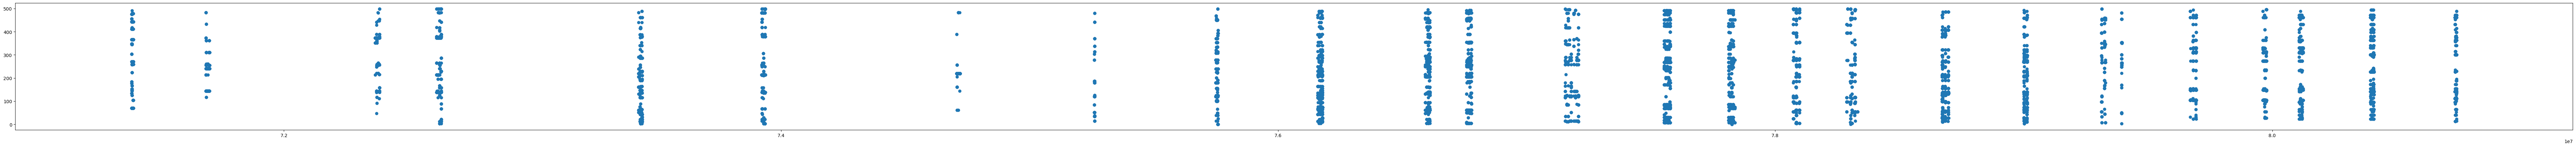

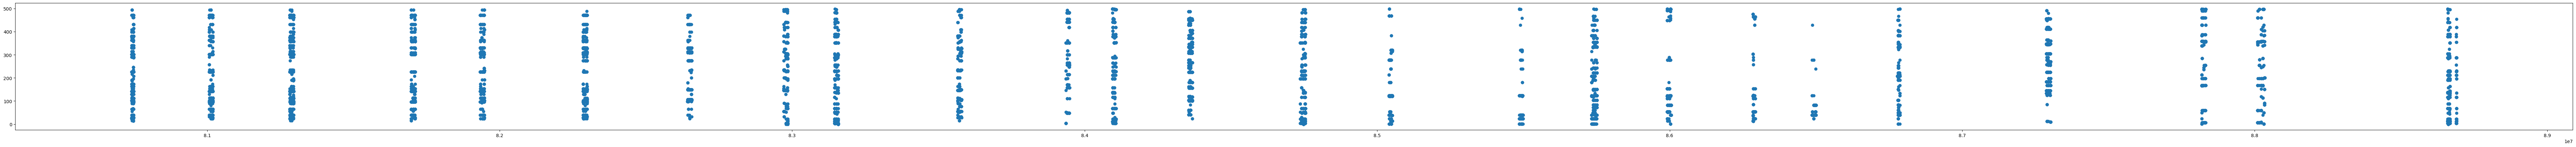

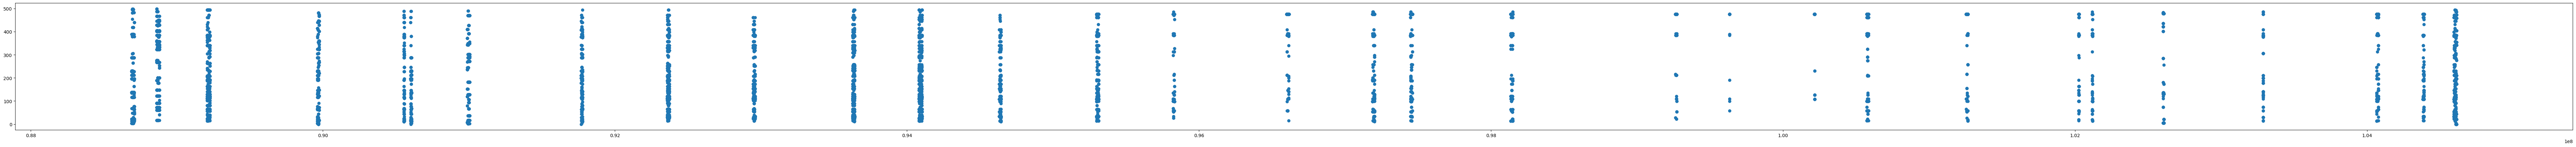

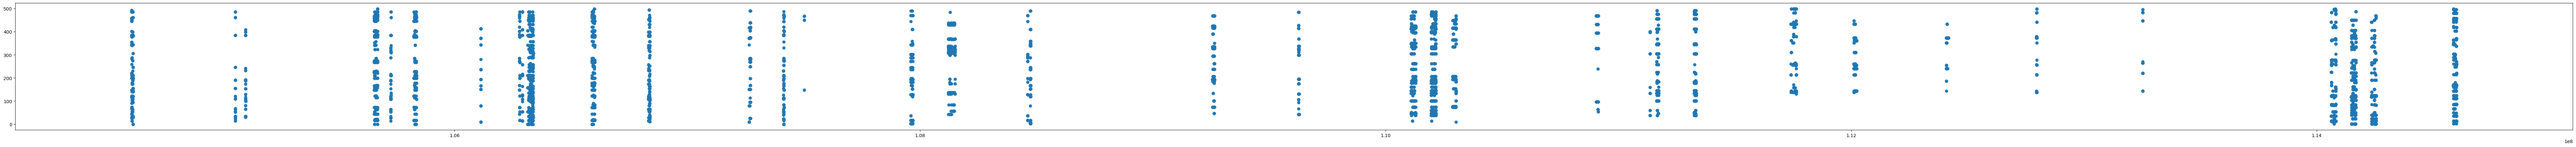

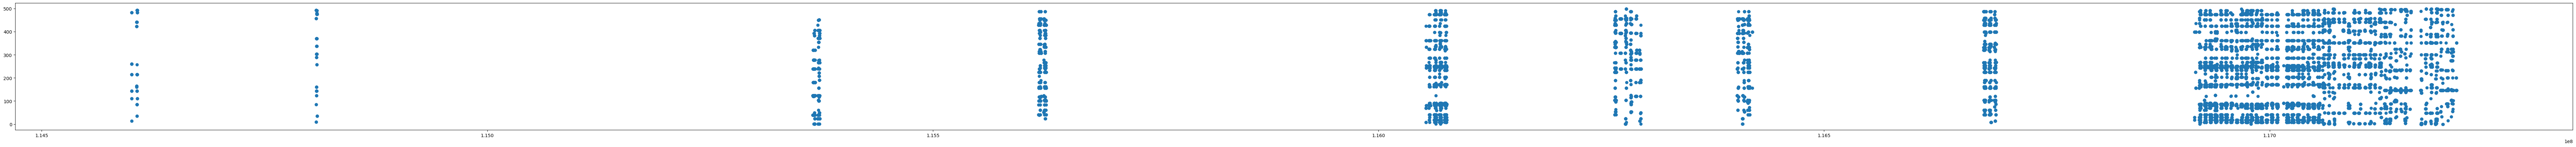

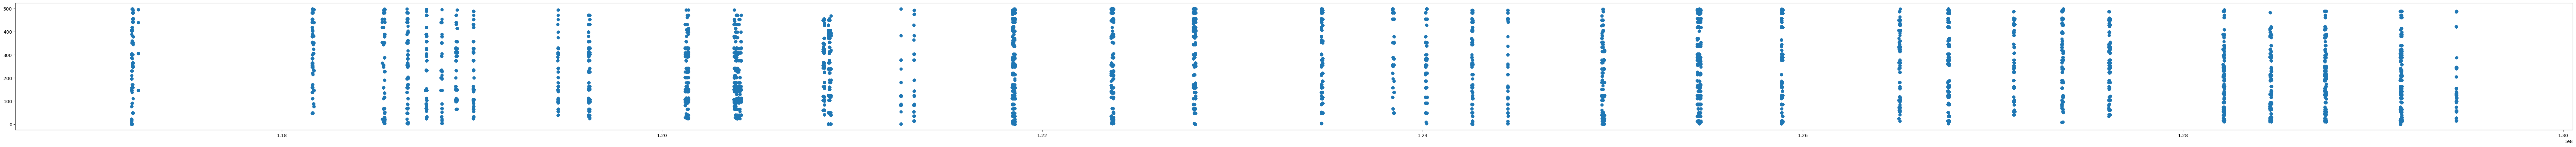

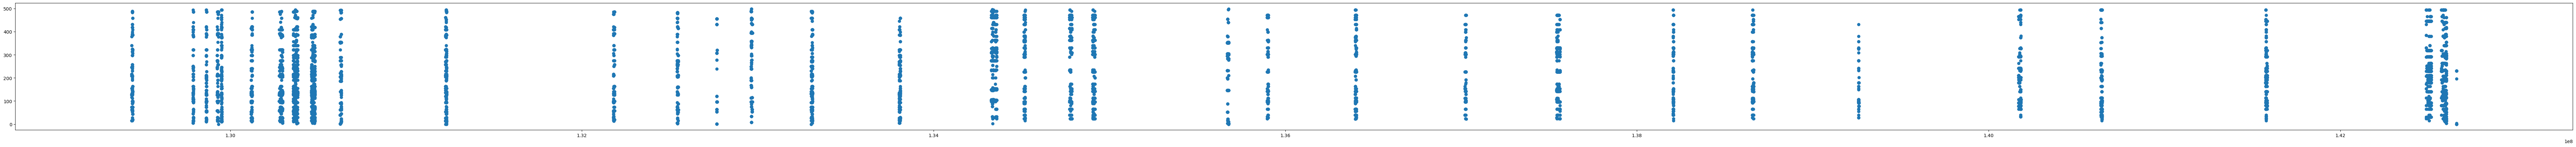

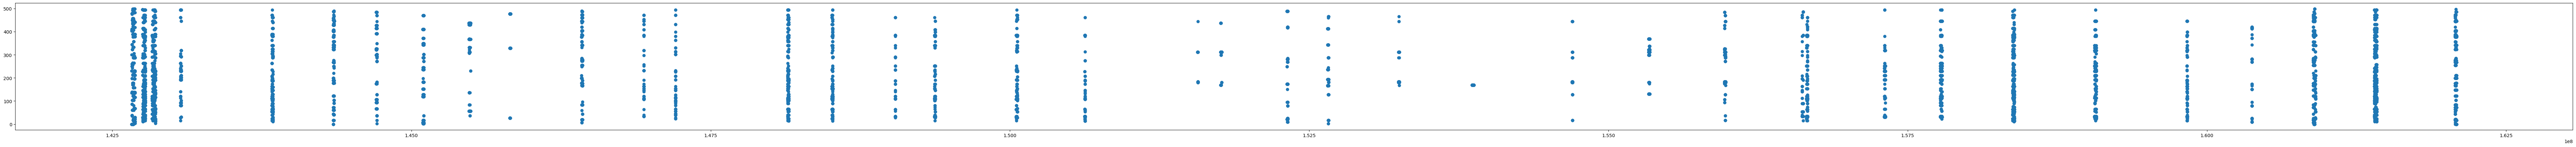

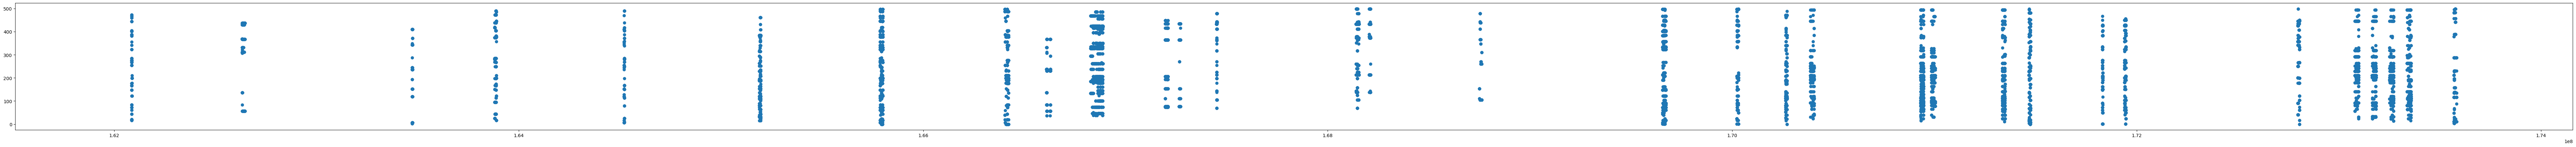

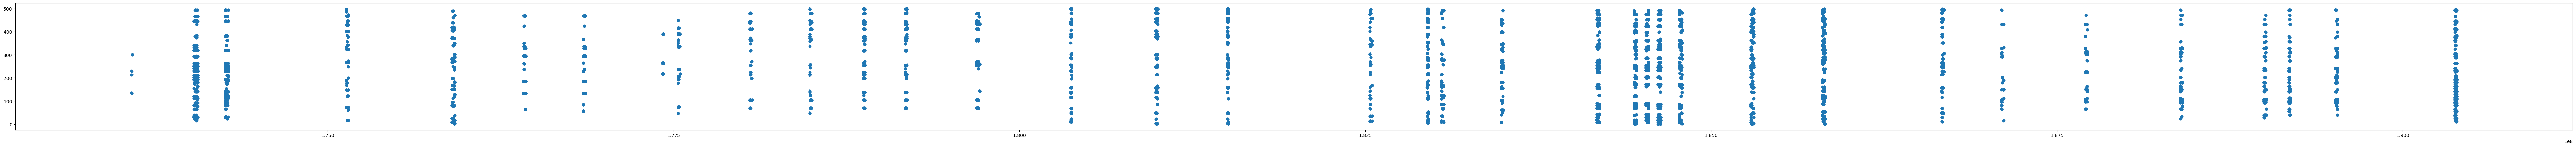

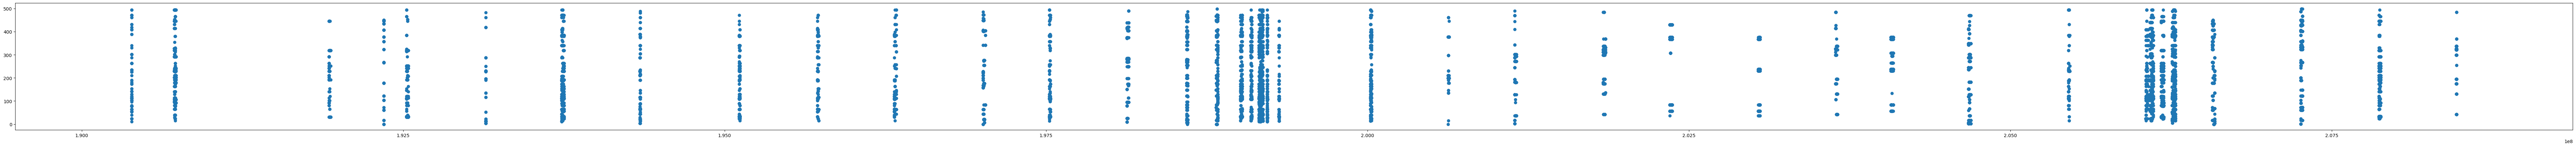

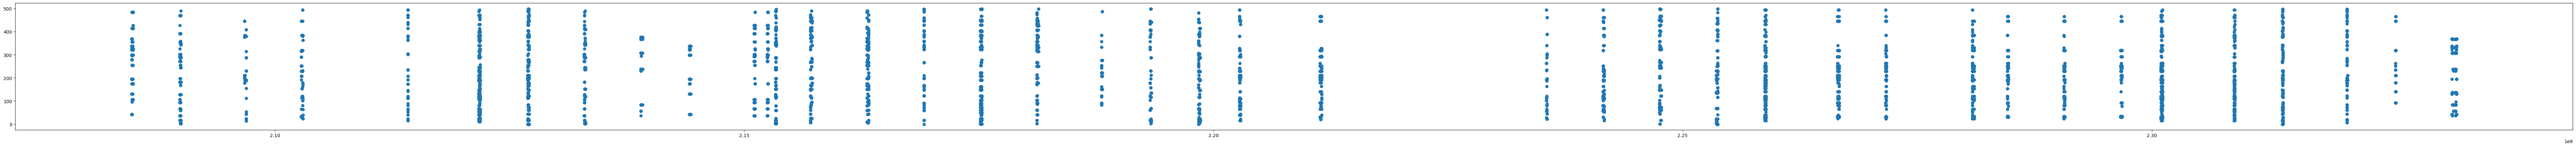

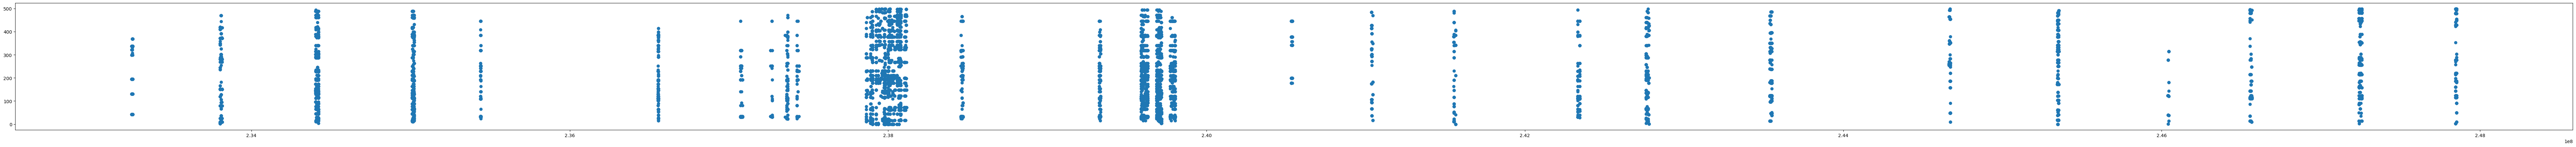

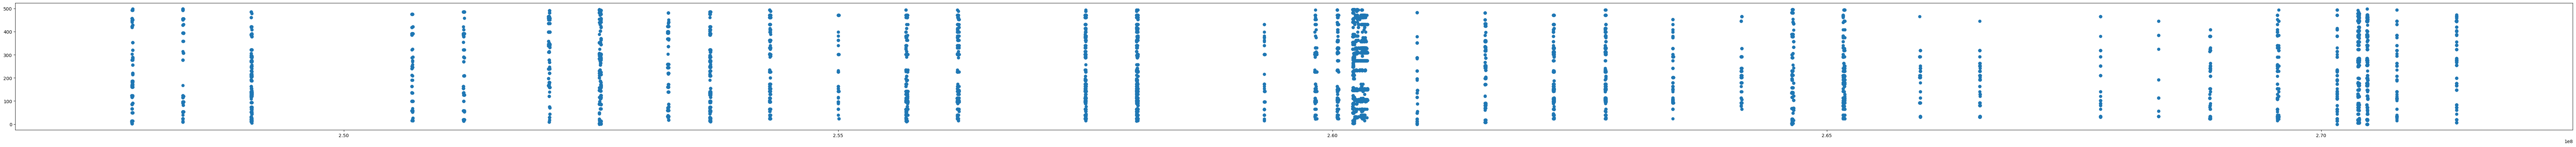

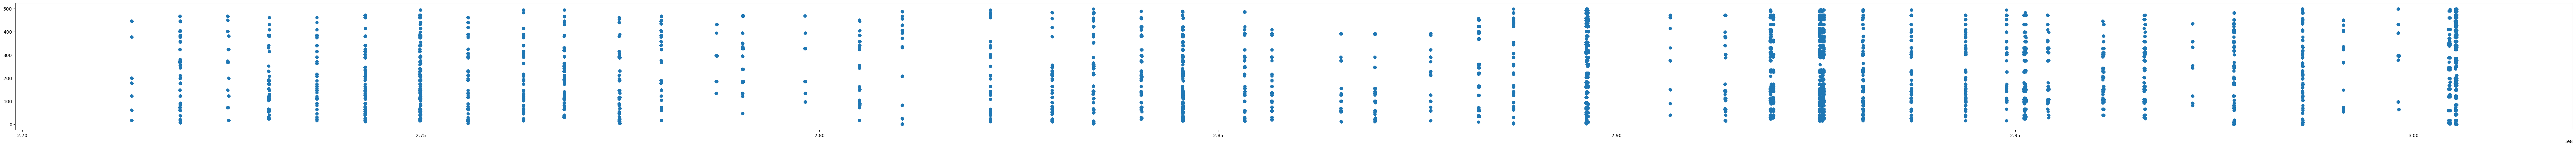

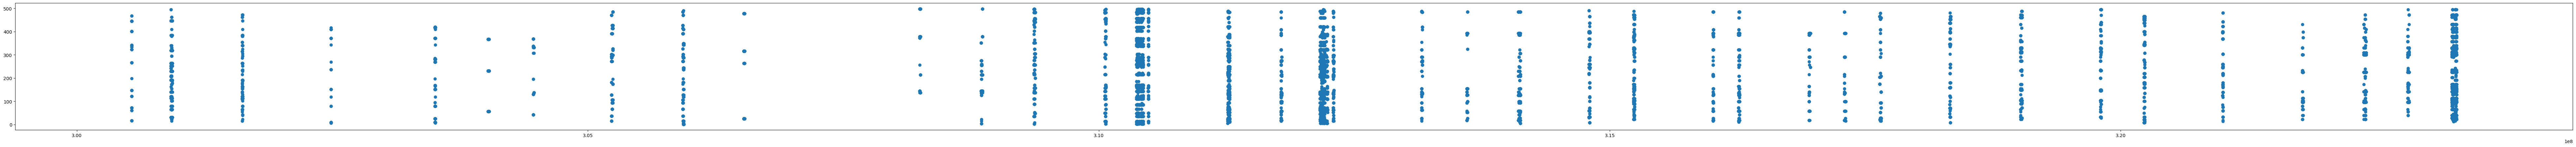

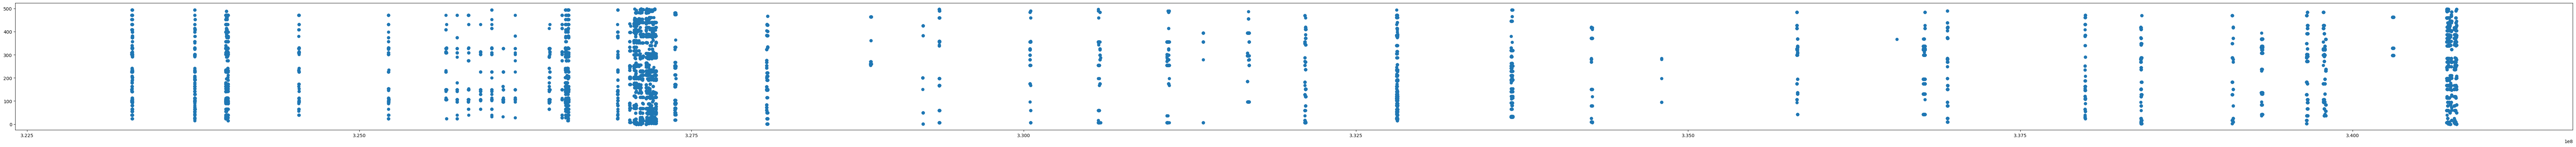

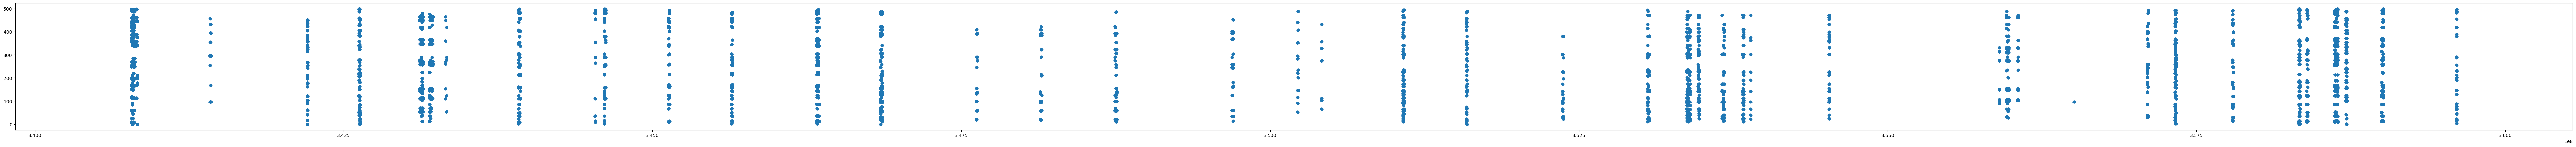

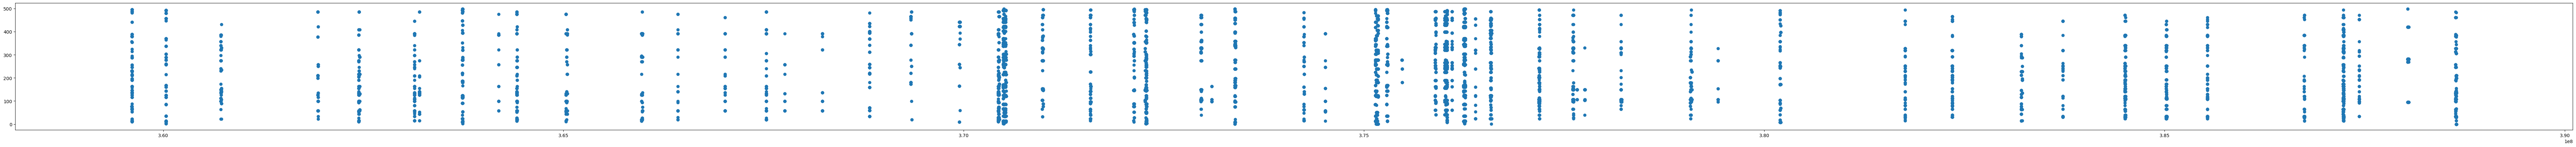

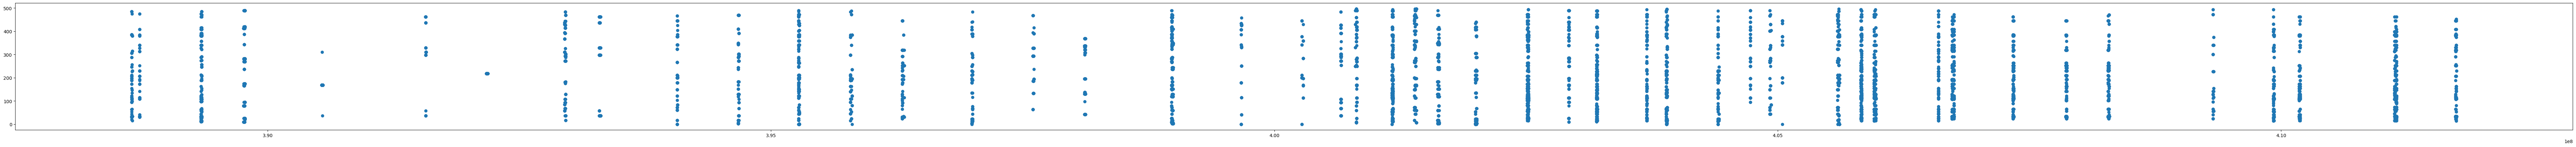

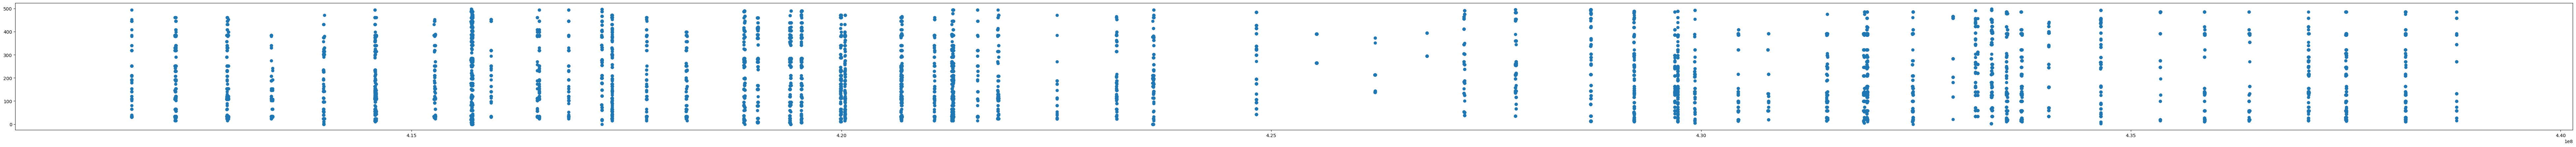

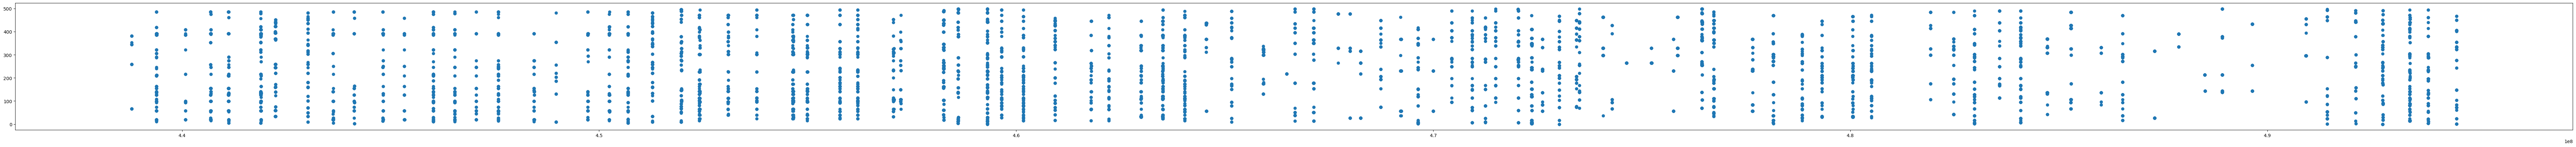

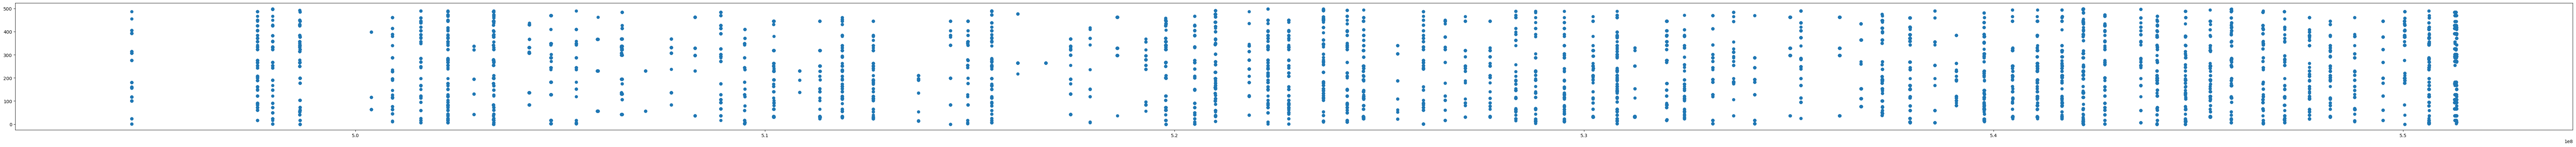

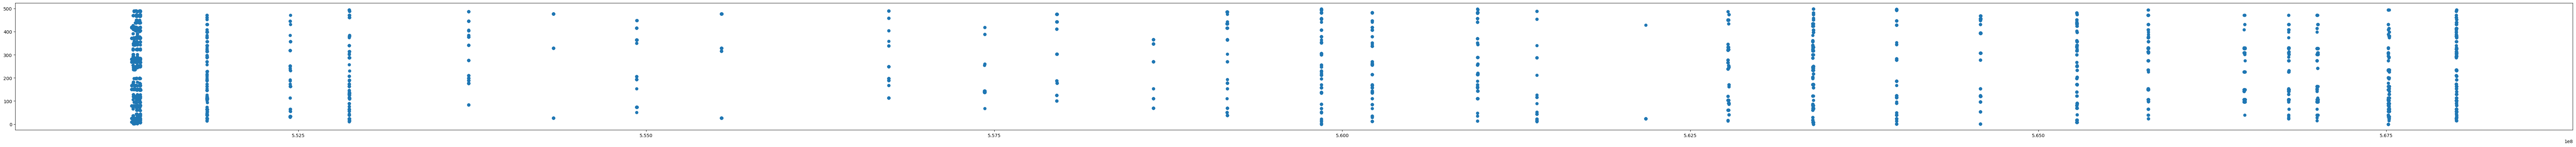

In [6]:
with open('{}/468202_len128_s2_4cad_start_times_errorfix.pkl'.format(data_dir), 'rb') as f:
    seg_id_start_time_df = pickle.load(f)
    
JD_times = np.sort(seg_id_start_time_df.Start_time.values)

    
with open('{}/GMM_500comp_labels_chronologically.pkl'.format(data_dir), 'rb') as f:
    chrono_clusters = pickle.load(f)
    
with open('{}/GMM_shape16_moments4_components500_alldata.pkl'.format(data_dir), 'rb') as f:
    GMM_500 = pickle.load(f)
    
from sklearn.cluster import OPTICS

clustering = OPTICS().fit(GMM_500.means_)
reordered_chrono_clusters = clustering.ordering_[chrono_clusters]



plt.rcParams['figure.figsize'] = [100,5]
for interval in np.arange(0,468202, 20000):
    plt.scatter(JD_times[interval:interval+20000], reordered_chrono_clusters[interval:interval+20000])
    plt.show()

In [ ]:
Edges_dict = {key:[] for key in np.unique(reordered_chrono_clusters)}
for point_index, point_cluster in enumerate(reordered_chrono_clusters):
    point_time
    next_cluster = 
    next_time = 
    
    if (next_cluster != point_cluster) and (next_time-point_time == ):
        Edges_dict.setdefault(ObID, []).append(ID_index)

In [7]:
# make a dictorionary that groups indices of segments of the same observation 
ObID_SegIndices_dict = {key:[] for key in np.unique(seg_ObIDs)}
for ID_index, ObID in enumerate(seg_ObIDs):
    ObID_SegIndices_dict.setdefault(ObID, []).append(ID_index)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18